**Homework - Lecture 2**

---

*Instructions:* Please complete the following exercises and submit your solutions by the next class session.

---

# Maximum Likelihood Estimation (MLE) of Multivariate Normal Distribution

**1. Prove the formulas for the MLE of the mean 
vector and covariance matrix of a multivariate normal distribution.**

**2. Comment on the bias of the MLE estimator for the covariance matrix. How to correct it?**

# Stock Data Analysis

**1. Imports the necessary libraries**

In [2]:
# TODO
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd


**2. Using the api [yfinance](https://pypi.org/project/yfinance/) , download the historical daily prices for Apple, JP Morgan, Pfizer, and Exxon Mobil, for the period from January 1, 2020, to December 31, 2025. Save the data in four distinct DataFrames and save the data in a csv file. Describe quickly each dataset.**

In [18]:
# TODO
start_date = "2020-01-01"
end_date = "2026-01-01"

tickers = ["AAPL","JPM","PFE","XOM"]

close_df = yf.download(
    ticker,
    start=start_date,
    end=end_date,
    interval="1d",
)["Close"]

close_df = close_df.dropna()
close_df.to_csv("close_price_2020_2025.csv")

aapl_data = close_df[["AAPL"]].copy()
jpm_data  = close_df[["JPM"]].copy()
pfe_data  = close_df[["PFE"]].copy()
xom_data = close_df[["XOM"]].copy()

aapl_data



[*********************100%***********************]  4 of 4 completed


Ticker,AAPL
Date,
2020-01-02,72.468262
2020-01-03,71.763741
2020-01-06,72.335556
2020-01-07,71.995346
2020-01-08,73.153496
...,...
2025-12-24,273.809998
2025-12-26,273.399994
2025-12-29,273.760010


**3. For each stock, calculate the daily returns and add them as a 
new column in the respective DataFrame. Plot the returns for each stock using a 2x2 figure.**

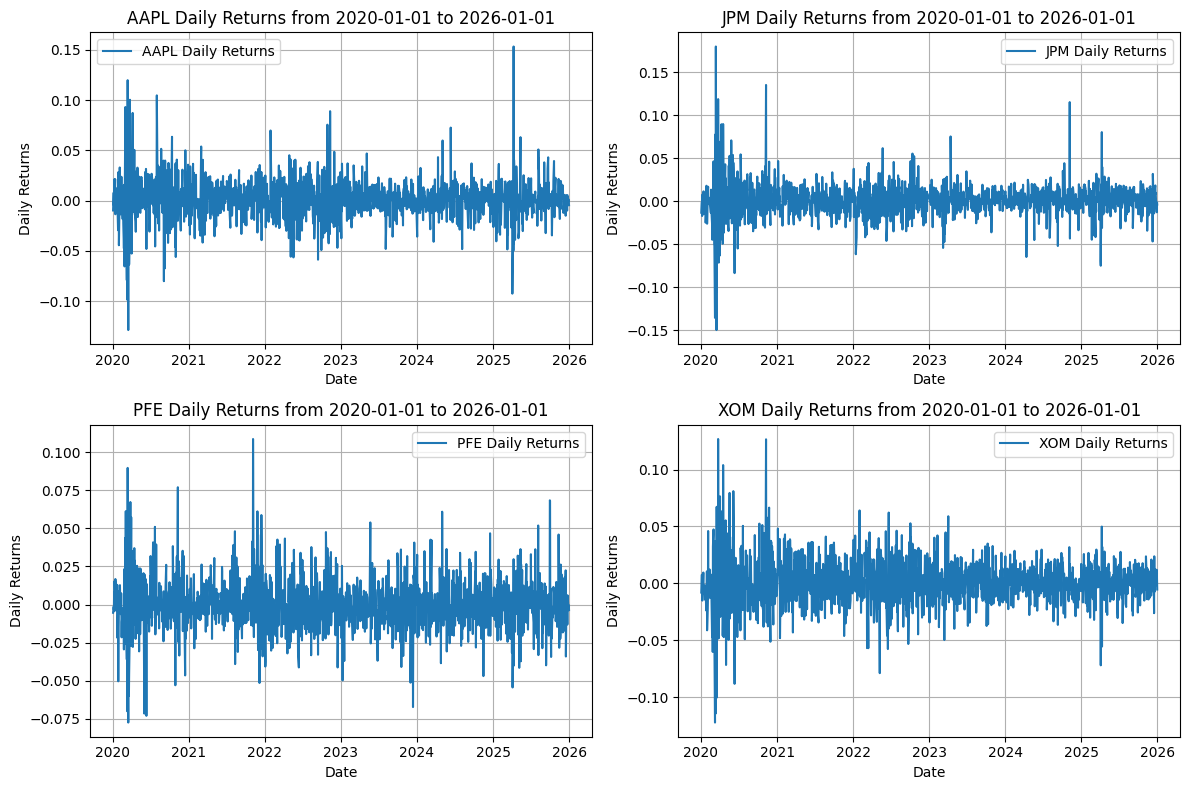

In [21]:
# TODO
returns_df = close_df.pct_change().dropna()

stock_returns = {}

for t in tickers:
    df = pd.DataFrame({
        "Close": close_df[t],
        "Returns": returns_df[t]
    })
    stock_returns[t] = df

fig, ax = plt.subplots(2, 2, figsize=(12, 8))
axes = ax.ravel()

for i, t in enumerate(tickers):
    axes[i].plot(stock_returns[t].index, stock_returns[t]["Returns"], label=f"{t} Daily Returns")
    axes[i].set_title(f"{t} Daily Returns from {start_date} to {end_date}")
    axes[i].set_xlabel("Date")
    axes[i].set_ylabel("Daily Returns")
    axes[i].legend()
    axes[i].grid()  

plt.tight_layout()

4. **Calculate and plot the cumulative returns for each stock over the entire period. Which stock had the highest cumulative return?**

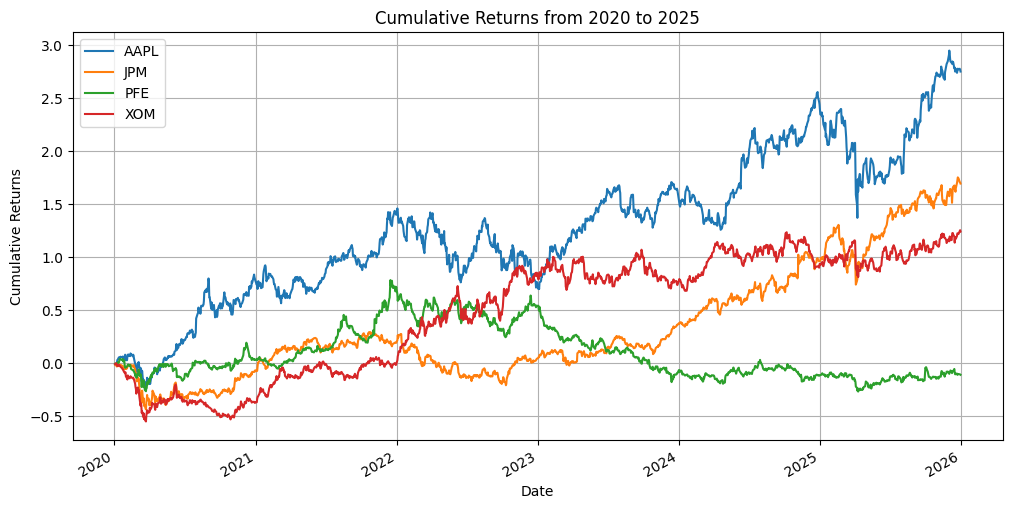

Cumulative Returns from 2020 to 2025:
Ticker
AAPL    2.751435
JPM     1.694747
PFE    -0.109296
XOM     1.242567
Name: 2025-12-31 00:00:00, dtype: float64

Highest cumulative return: AAPL (275.14%)


In [26]:
# TODO
cumulative_returns = (1 + returns_df).cumprod() - 1
cumulative_returns.plot(figsize=(12, 6))
plt.title("Cumulative Returns from 2020 to 2025")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend(tickers)
plt.grid()
plt.show()

end_cumulative_returns = cumulative_returns.iloc[-1]
best_ticker = end_cumulative_returns.idxmax()

print("Cumulative Returns from 2020 to 2025:")
print(end_cumulative_returns)
print(f"\nHighest cumulative return: {best_ticker} ({end_cumulative_returns[best_ticker]*100:.2f}%)")

**5. For each stock, calculate the rolling moving averages of the daily closing prices using a time window of 30, 60, and 90 days and plot them.**

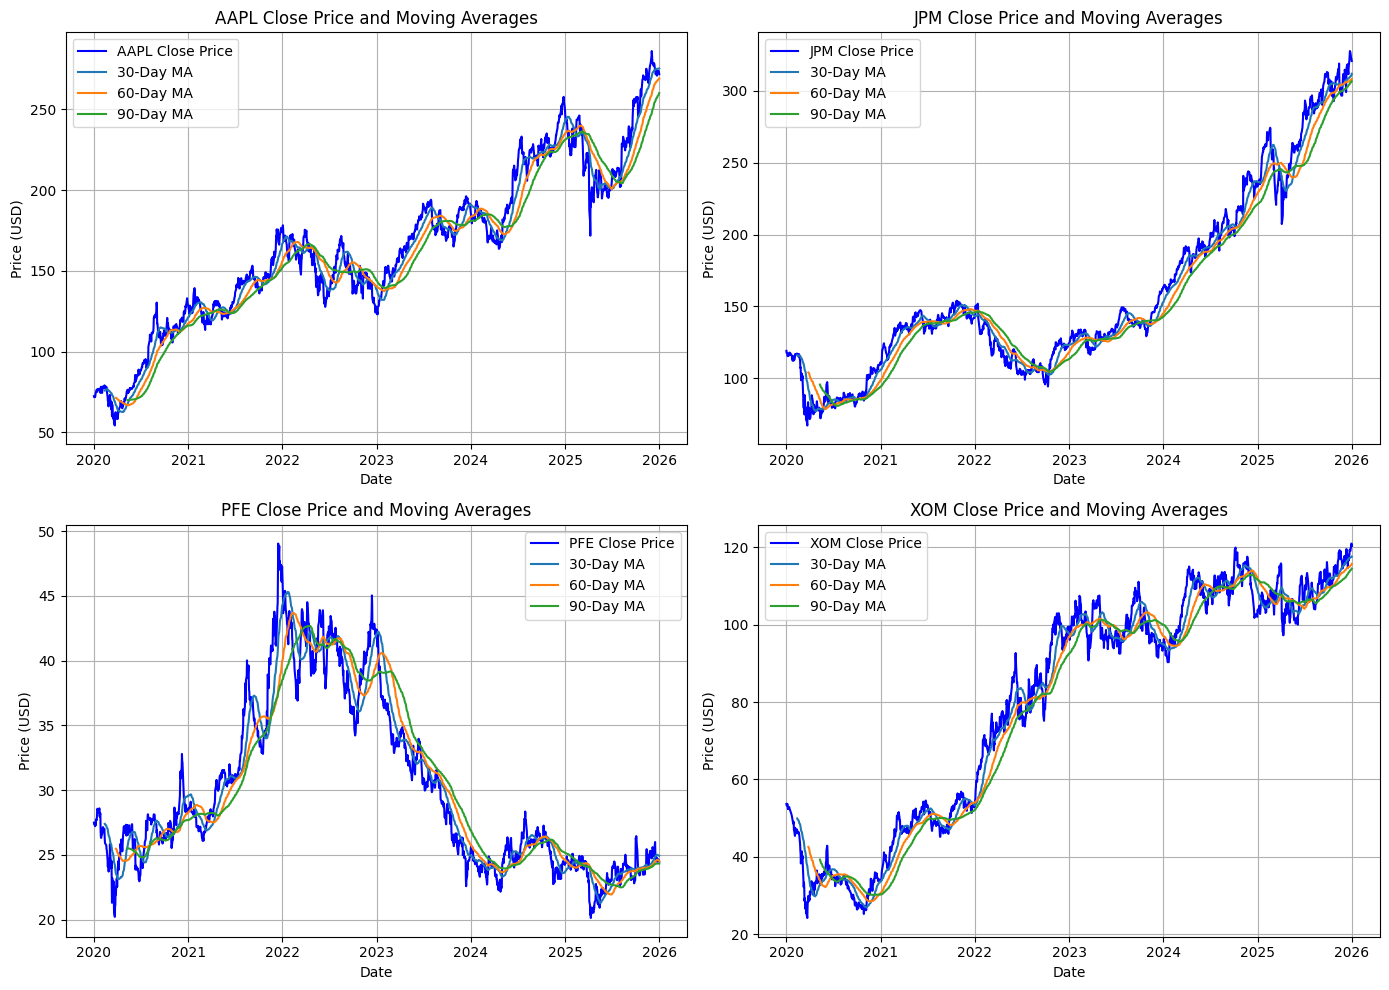

In [30]:
# TODO
windows = [30,60,90]

move_averages = {}

for w in windows:
    ma_df = close_df.rolling(window=w).mean()
    move_averages[w] = ma_df

fig, ax = plt.subplots(2, 2, figsize=(14, 10))
axes = ax.ravel()

for i, t in enumerate(tickers):
    axes[i].plot(close_df.index, close_df[t], label=f"{t} Close Price", color='blue')
    for w in windows:
        axes[i].plot(move_averages[w].index, move_averages[w][t], label=f"{w}-Day MA")
    axes[i].set_title(f"{t} Close Price and Moving Averages")
    axes[i].set_xlabel("Date")
    axes[i].set_ylabel("Price (USD)")
    axes[i].legend()
    axes[i].grid()

plt.tight_layout()
plt.show()


